1. Introducing Broadcasting

In [1]:
import numpy as np


In [6]:
# Recall that for arrays of the same size, binary operations are performed on an element-by-element basis
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [9]:
# Broadcasting allows these types of binary operations to be performed on arrays of dif‐
# ferent sizes—for example, we can just as easily add a scalar (think of it as a zero￾
# dimensional array) to an array
a = np.array([0, 1, 2])
a + 5
# Here, 5 is broadcast to the shape of a — as if it becomes [5, 5, 5], and the operation proceeds element-wise.

array([5, 6, 7])

In [10]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
a

array([0, 1, 2])

In [13]:
M + a # Here, the 1D array a is broadcast to the shape of M, as if it becomes [[0, 1, 2], [0, 1, 2], [0, 1, 2]].

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [ ]:
a = np.arange(3)  # → [0, 1, 2]     → shape (3,)
b = np.arange(3)[:, np.newaxis]  # → [[0], [1], [2]] → shape (3, 1) # This adds a new axis to b, making it a column vector
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [19]:

'''
[[0],       +    [0, 1, 2]      =  [[0, 1, 2],
 [1],                             [1, 2, 3],
 [2]]                             [2, 3, 4]]

'''

'\n[[0],       +    [0, 1, 2]      =  [[0, 1, 2],\n [1],                             [1, 2, 3],\n [2]]                             [2, 3, 4]]\n\n'

In [20]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [22]:
# bradcasting exaple 1  
M = np.ones((2, 3))
a = np.arange(3) # → [0, 1, 2] → shape (3,)

Let’s consider an operation on these two arrays, which have the following shapes:
• M.shape is (2, 3)
• a.shape is (3,)
We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with
ones:
• M.shape remains (2, 3)
• a.shape becomes (1, 3)
By rule 2, we now see that the first dimension disagrees, so we stretch this dimension
to match:
• M.shape remains (2, 3)
• a.shape becomes (2, 3)
The shapes now match, and we see that the final shape will be (2, 3):

In [24]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [26]:
# Bradcasting example 2
a = np.arange(3).reshape((3, 1)) # → [[0], [1], [2]] → shape (3, 1)
b = np.arange(3) # → [0, 1, 2] → shape (3,)

In [ ]:
# Again, we’ll start by determining the shapes of the arrays:
# • a.shape is (3, 1)
# • b.shape is (3,)
# Rule 1 says we must pad the shape of b with ones:
# • a.shape remains (3, 1)
# • b.shape becomes (1, 3)
# And rule 2 tells us that we must upgrade each of these 1s to match the corresponding
# size of the other array:
# • a.shape becomes (3, 3)
# • b.shape becomes (3, 3)
'''
Initial arrays:

a = np.arange(3).reshape((3, 1))  # shape (3,1)
b = np.arange(3)                  # shape (3,)
a looks like:
[[0],
 [1],
 [2]]
 
b looks like: [0, 1, 2]

Step 1: Apply Rule 1 — Pad shape of b with ones on the left
a.shape = (3, 1)

b.shape = (3,) → pad to (1, 3)

Step 2: Apply Rule 2 — Stretch dimensions where size is 1
a.shape = (3, 1) → expand to (3, 3)

b.shape = (1, 3) → expand to (3, 3)

Each array is virtually duplicated along the dimensions where size was 1.

Final shapes:
Both arrays now behave like (3, 3) arrays, so element-wise addition works:

a + b = 
[[0+0, 0+1, 0+2],
 [1+0, 1+1, 1+2],
 [2+0, 2+1, 2+2]]
= 
[[0, 1, 2],
 [1, 2, 3],
 [2, 3, 4]]
'''

In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [30]:
# Broadcasting example 3
M = np.ones((3, 2))
a = np.arange(3)

In [31]:
# xplicitly reshape a to have shape (3,1) so it broadcasts correctly:
a[:, np.newaxis].shape  # (3, 1)
# Now:
# M.shape = (3, 2)
# a[:, np.newaxis].shape = (3, 1)


(3, 1)

In [32]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [33]:
# Universal functions (ufuncs) like np.logaddexp also use broadcasting:
np.logaddexp(M, a[:, np.newaxis])

# array([[1.31326169, 1.31326169],
#        [1.69314718, 1.69314718],
#        [2.31326169, 2.31326169]])


array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

5. Centering an Array

In [34]:
#1. Generate random data matrix X:
rng = np.random.default_rng(seed=1701)
X = rng.random((10, 3))
# X is a 10×3 matrix: 10 observations, each with 3 values.
# Shape: (10, 3)



In [35]:
# 2. Compute the mean of each column (feature):
Xmean = X.mean(axis=0)  # shape (3,)
# This calculates mean along axis 0 (down each column).
# Result is a 1D array of shape (3,) — the mean of each column.



In [37]:
# 3. Center the data by subtracting the column means:
X_centered = X - Xmean

# Here broadcasting kicks in.

# X shape: (10, 3)

# Xmean shape: (3,) → padded to (1, 3)

# Xmean is broadcasted to (10, 3) by duplicating the mean values across all rows.

# Then subtraction happens element-wise.





In [39]:
# 4. Verify the centering worked:
X_centered.mean(axis=0)
# Output close to [0, 0, 0]
# The mean of each centered column is effectively zero (within floating-point precision).

array([ 4.99600361e-17, -4.44089210e-17,  0.00000000e+00])

6. Plotting a Two-Dimensional Function

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50) # x is a 1D array with 50 values between 0 and 5.
y = np.linspace(0, 5, 50)[:, np.newaxis] # y is reshaped to a column vector using np.newaxis, making it 2D with shape (50, 1).
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

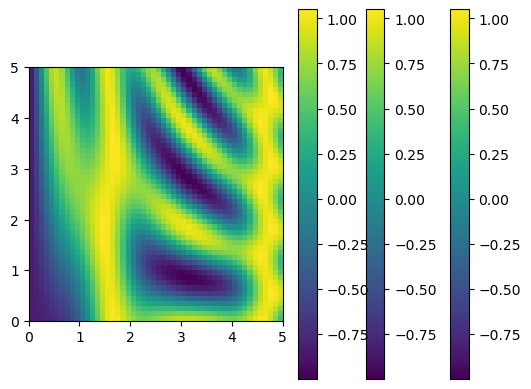

In [44]:
plt.imshow(z, origin = 'lower', extent=[0, 5, 0, 5]) 
plt.colorbar();
plt.show();